.Shp 파일을 이용한 서울 구별 인구밀도 단계구분도

In [8]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
input_folder = Path("../PythonWorkspace/Seoul.shp")
fp = input_folder / "서울_시군구.shp"
Seoul = gpd.read_file(fp)

In [10]:
Seoul.crs #좌표계 확인
#Seoul.to_crs(espg=????) <<< CRS 변경 가능

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
Seoul.head()

,DISTRICT_I,DISTRICT_N,DISTRICT_T,X_COORDINA,Y_COORDINA,UPDISTRICT,AREA,CITY,Popden,geometry
0,11010,종로구,3,953859.087841,1.955185e+06,11,2.397306e+07,서울특별시,6649,"POLYGON ((953683.831 1959209.867, 953647.336 1..."
1,11020,중구,3,955479.682109,1.951317e+06,11,9.982380e+06,서울특별시,13517,"POLYGON ((957890.389 1952616.741, 957909.911 1..."
2,11030,용산구,3,954048.343054,1.948133e+06,11,2.187632e+07,서울특별시,11188,"POLYGON ((953114.224 1950746.994, 953114.209 1..."
3,11040,성동구,3,959461.062083,1.950286e+06,11,1.680424e+07,서울특별시,17822,"POLYGON ((959381.840 1952723.889, 959416.045 1..."
4,11050,광진구,3,963406.655140,1.949790e+06,11,1.703593e+07,서울특별시,21105,"POLYGON ((964825.061 1952633.245, 964875.568 1..."


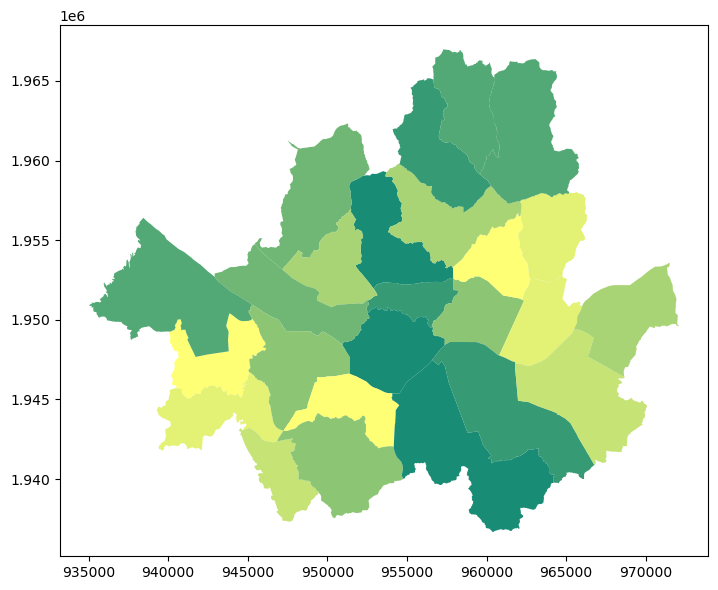

In [12]:
fig, ax = plt.subplots(figsize=(10, 6)) 
#fig = figure : 데이터 프레임 크기, ax = axes : 데이터가 나타나는 캔버스
#Output 기준 하얀 상자 전체 = fig, 지도 layout = ax
Seoul.plot(ax=ax,
    column="Popden", #단계구분도 Value 선택
    linewidth=0.03,
    cmap="summer", #matplot color map 종류 선택
    scheme="quantiles", #classification scheme 선택
    k=9, #Class(변수) 갯수 조절
    alpha=0.9 #투명도 조절
    ) 

plt.tight_layout() #ax 여백 없애기


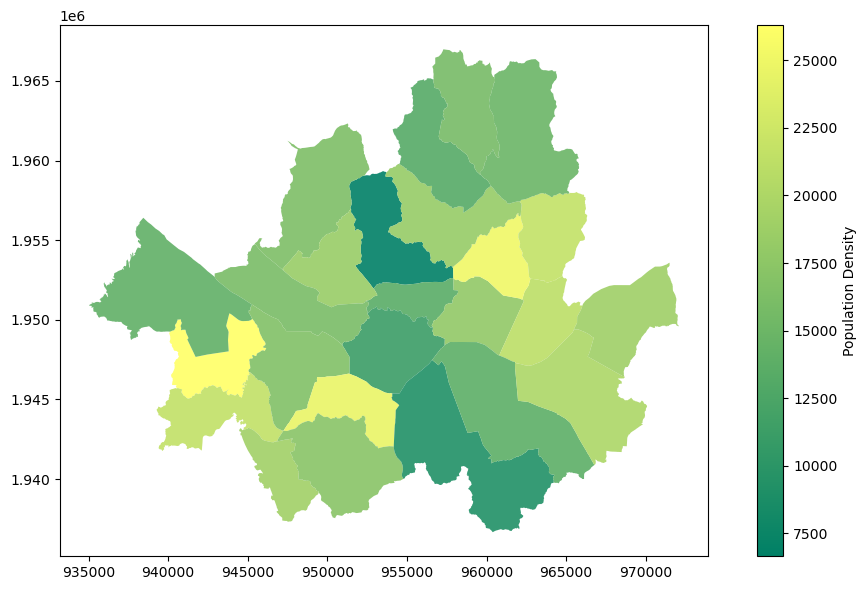

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
Seoul.plot(
    ax=ax,
    column="Popden",
    linewidth=0.03,
    cmap="summer",
    alpha=0.9,
    legend=True, #Legend 존재 여부 >> True : 존재, False : 비존재
    legend_kwds={"label": "Population Density"}, #Legend title
)
plt.tight_layout()

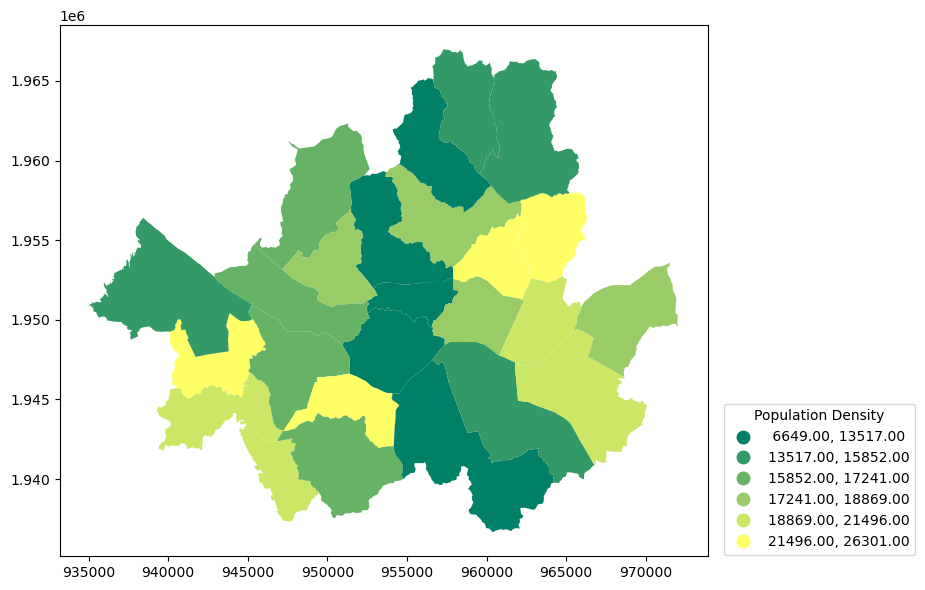

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
Seoul.plot(
    ax=ax,
    column="Popden",
    linewidth=0.03,
    cmap="summer",
    scheme="quantiles",
    k=6,
    legend=True,
)

ax.get_legend().set_bbox_to_anchor((1.33, 0.3))
ax.get_legend().set_title("Population Density")

plt.tight_layout()

outfp = "Popden in Seoul.png"
plt.savefig(outfp, dpi=300)

